# 1 - Title: Home Credit Analysis

Objectives:
* Menyimpulkan insights dan memvisualisasikan untuk kebutuhan teknis dan bisnis.

* Membuat model Classification untuk memprediksi pembayaran nasabah.

# 2 - Introduction

Nama: Imam Buchori Zarkasie

Description: Membuat Exploratory Data Analysis (EDA) dan mengklasifikasikan nasabah yang memiliki resiko masalah pembayaran kredit.

# 3 - External Link

* Deployment Link: (https://huggingface.co/spaces/imamzarkasie/HOME-CREDIT-ANALYSIS)

* Deck: (https://www.canva.com/design/DAFk9XzBkzk/fsBGVDV12oEZ2jWnAaE-5Q/edit?utm_content=DAFk9XzBkzk&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton)

* Elevator Pitch: (https://drive.google.com/file/d/1NGZwulGF2YFrSBGtdz221ki30mmbXOhC/view?usp=drivesdk)

# 4 - Working Area

## 1 - Import Library

In [ ]:
# Library Pengolahan Data
import numpy as np
import pandas as pd

# Library Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

#Import pandas and Bigquery
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# preprocessing
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_classif, chi2
!pip install feature_engine
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

#model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, concatenate, Dropout, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.models import load_model

#evaluasi
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, cross_validate


#save model
import joblib
import pickle
import json

import warnings
warnings.filterwarnings("ignore")
# Library Split Test dan Train
from sklearn.model_selection import train_test_split



# Library Model
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
import tensorflow_hub as hub


# Library Evaluasi
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix, roc_auc_score
from collections import Counter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 7.0 MB/s eta 0:00:00


## 2 - Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/home-credit-default-risk/application_train.csv")

In [ ]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
df_dup = df_train.copy()

In [ ]:
# Cek Value Duplikat
df_train.duplicated().sum()

0

Tidak terdapat data yang terduplikasi.

In [ ]:
df_inf = pd.read_csv('/content/drive/MyDrive/home-credit-default-risk/application_test.csv')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
df_bureau = pd.read_csv("/content/drive/MyDrive/home-credit-default-risk/bureau.csv")

In [ ]:
df_bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [ ]:
df_bureau_balance = pd.read_csv("/content/drive/MyDrive/home-credit-default-risk/bureau_balance.csv")

In [ ]:
df_bureau_balance

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [ ]:
df_bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [ ]:
df_previous_app = pd.read_csv("/content/drive/MyDrive/home-credit-default-risk/previous_application.csv")

In [ ]:
df_previous_app

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [ ]:
df_cc_balance = pd.read_csv("/content/drive/MyDrive/home-credit-default-risk/credit_card_balance.csv")

In [ ]:
df_cc_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


## 3 - EDA

### Customer Payment (TARGET)

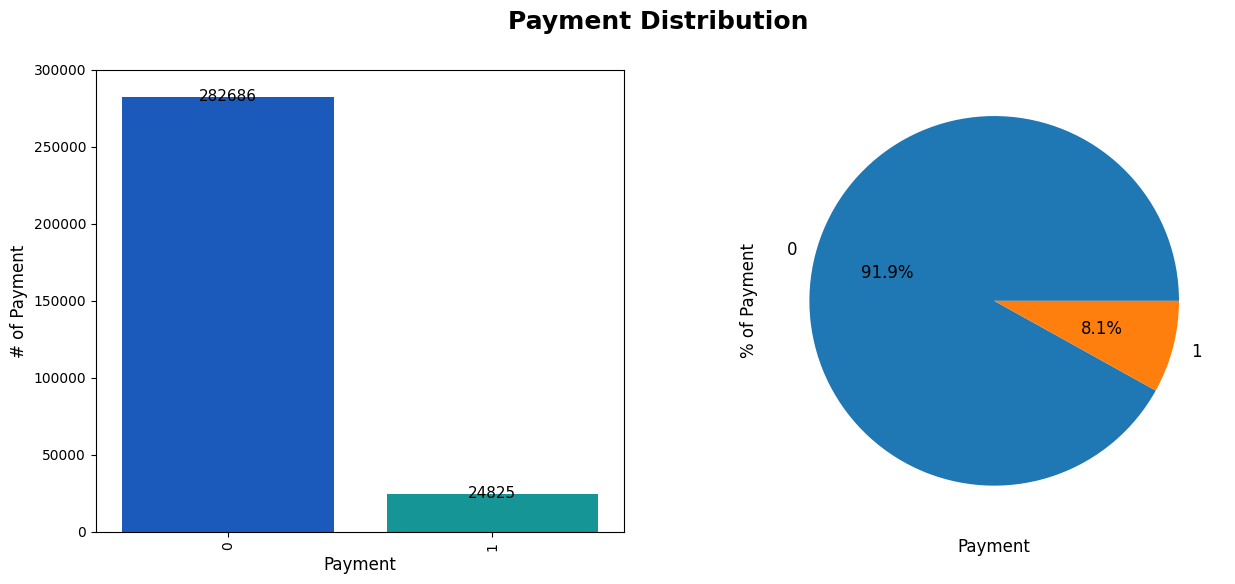

In [ ]:
# Membuat visualisasi Distribusi Payment
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='TARGET', data=df_train, palette="winter", ax=ax[0])
ax[0].set_xlabel("Payment", fontsize= 12)
ax[0].set_ylabel("# of Payment", fontsize= 12)
fig.suptitle('Payment Distribution', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,300000)
ax[0].tick_params(axis='x', rotation=90)
plt.xlabel("Payment", fontsize= 12)
plt.ylabel("# of Payment", fontsize= 12)

for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+205), ha='center', va='center',fontsize = 11)

df_train['TARGET'].value_counts().plot(kind='pie',autopct='%1.1f%%', textprops = {"fontsize":12})
ax[1].set_ylabel("% of Payment", fontsize= 12)
plt.show()

In [ ]:
df_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

Dari hasil visualisasi diatas ditemukan perbedaan jumlah yang signifikan antar Payment yang menunggak (**1**) sebanyak 282.686 dengan yang tidak (**0**) sebanyak 24.825. Dari hal tersebut saya akan melakukan sampling ulang agar data bisa balance.

### Contract Type

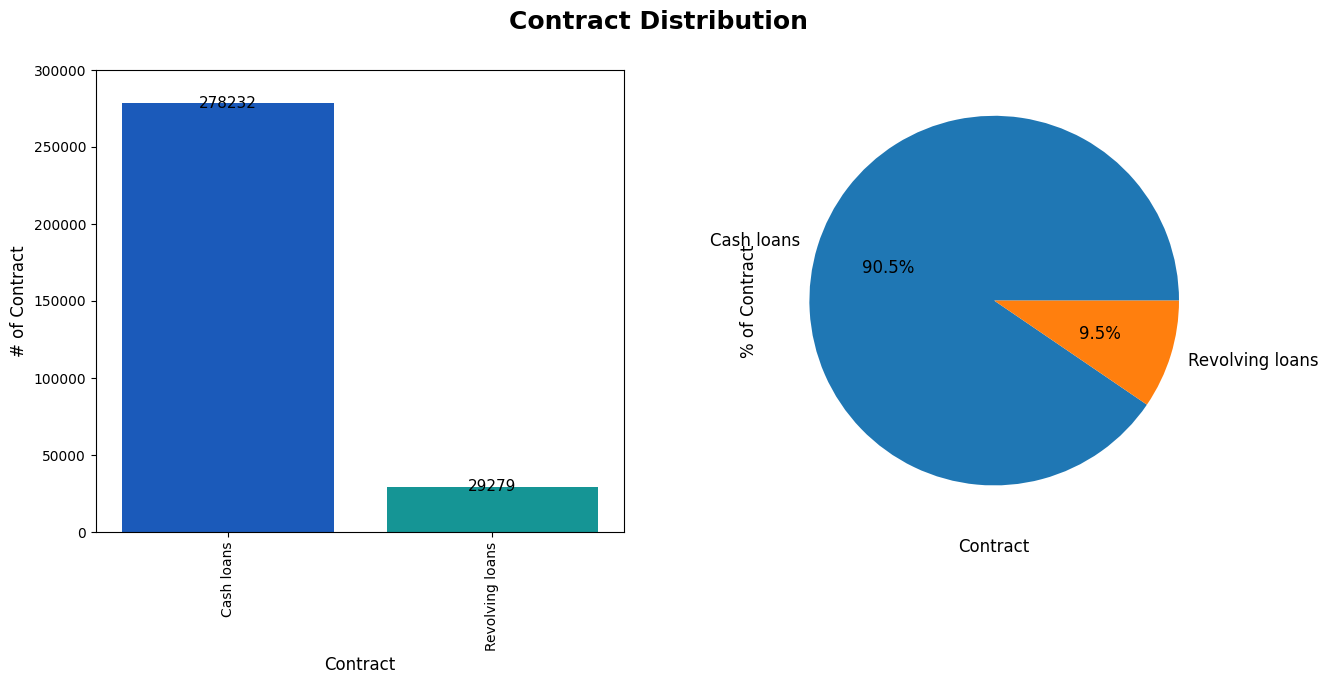

In [ ]:
# Membuat visualisasi Distribusi Contract
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='NAME_CONTRACT_TYPE', data=df_train, palette="winter", ax=ax[0])
ax[0].set_xlabel("Contract", fontsize= 12)
ax[0].set_ylabel("# of Contract", fontsize= 12)
fig.suptitle('Contract Distribution', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,300000)
ax[0].tick_params(axis='x', rotation=90)
plt.xlabel("Contract", fontsize= 12)
plt.ylabel("# of Contract", fontsize= 12)

for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+205), ha='center', va='center',fontsize = 11)

df_train['NAME_CONTRACT_TYPE'].value_counts().plot(kind='pie',autopct='%1.1f%%', textprops = {"fontsize":12})
ax[1].set_ylabel("% of Contract", fontsize= 12)
plt.show()

In [ ]:
import pandas as pd

# Assuming your data is stored in a DataFrame called "data"
data_with_target_1 = df_train[df_train['TARGET'] == 1]  # Filter data with TARGET=1

# Count the number of occurrences of each class in NAME_CONTRACT_TYPE
class_counts = data_with_target_1['NAME_CONTRACT_TYPE'].value_counts()

# Print the class counts
print(class_counts)


Cash loans         23221
Revolving loans     1604
Name: NAME_CONTRACT_TYPE, dtype: int64


Dari hasil visualisasi tersebut ditemukan bahwa "Cash Loans" memiliki pengguna yang jauh lebih banyak sebesar 278.232 dibanding "Revolving Loans" sebesar 29.279.

### Gender

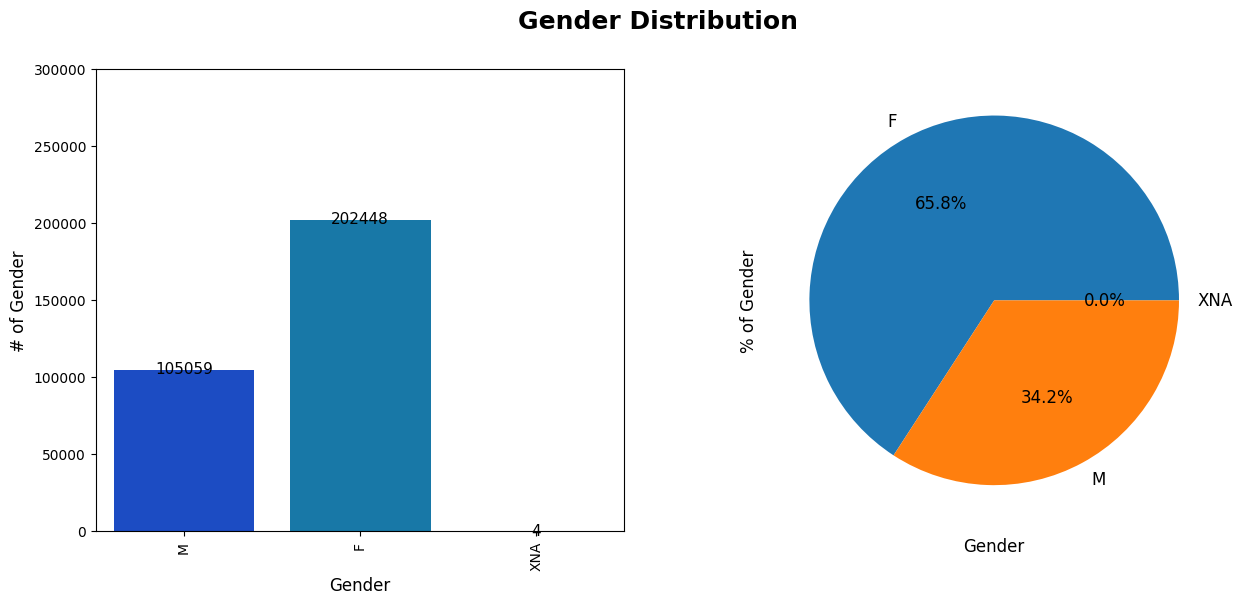

In [ ]:
# Membuat visualisasi Distribusi Gender
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='CODE_GENDER', data=df_train, palette="winter", ax=ax[0])
ax[0].set_xlabel("Gender", fontsize= 12)
ax[0].set_ylabel("# of Gender", fontsize= 12)
fig.suptitle('Gender Distribution', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,300000)
ax[0].tick_params(axis='x', rotation=90)
plt.xlabel("Gender", fontsize= 12)
plt.ylabel("# of Gender", fontsize= 12)

for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+205), ha='center', va='center',fontsize = 11)

df_train['CODE_GENDER'].value_counts().plot(kind='pie',autopct='%1.1f%%', textprops = {"fontsize":12})
ax[1].set_ylabel("% of Gender", fontsize= 12)
plt.show()

Pengguna kartu kredit didominasi oleh Gender "F". Ini menandakan bahwa customer wanita lebih banyak melakukan pinjaman kartu kredit.

In [ ]:
# Memfilter data dengan churn risk score = 1
filtered_data = df_train.loc[df_train['TARGET'] == 1]

# Menghitung jumlah customer berdasarkan gender
count_by_gender = filtered_data['CODE_GENDER'].value_counts()

print(count_by_gender)


F    14170
M    10655
Name: CODE_GENDER, dtype: int64


In [ ]:
# Memfilter data dengan churn risk score = 1
filtered_data = df_train.loc[df_train['TARGET'] == 0]

# Menghitung jumlah customer berdasarkan gender
count_by_gender = filtered_data['CODE_GENDER'].value_counts()

print(count_by_gender)


F      188278
M       94404
XNA         4
Name: CODE_GENDER, dtype: int64


### Amount Credit VS Gender

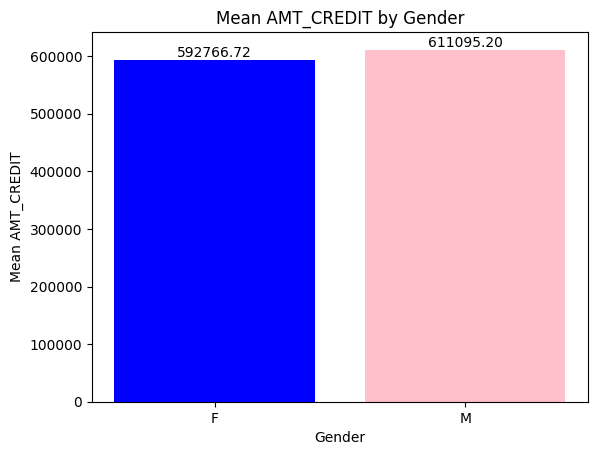

In [ ]:
# Menghapus baris dengan kelas "XNA"
df_gender = df_train.query('CODE_GENDER != "XNA"')  # atau df.loc[df['GENDER'] != 'XNA']

# Menghitung rata-rata AMT_CREDIT berdasarkan jenis kelamin
mean_credit_by_gender = df_gender.groupby('CODE_GENDER')['AMT_CREDIT'].mean()

import matplotlib.pyplot as plt

# Assuming you have calculated mean_credit_by_gender

# Create a bar plot with different colors for each gender
plt.bar(mean_credit_by_gender.index, mean_credit_by_gender.values, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Mean AMT_CREDIT')
plt.title('Mean AMT_CREDIT by Gender')

# Add text labels on top of each bar
for i, value in enumerate(mean_credit_by_gender.values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()


Pada kedua jenis gender tidak ditemukan perbedaan yang signifikan dari rata-rata pinjaman kartu kredit. Saya mengasumsikan bahwa besaran pinjaman **tidak** terlalu dipengaruhi oleh **gender** customer.

In [ ]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Amount Credit & Amount Income Total

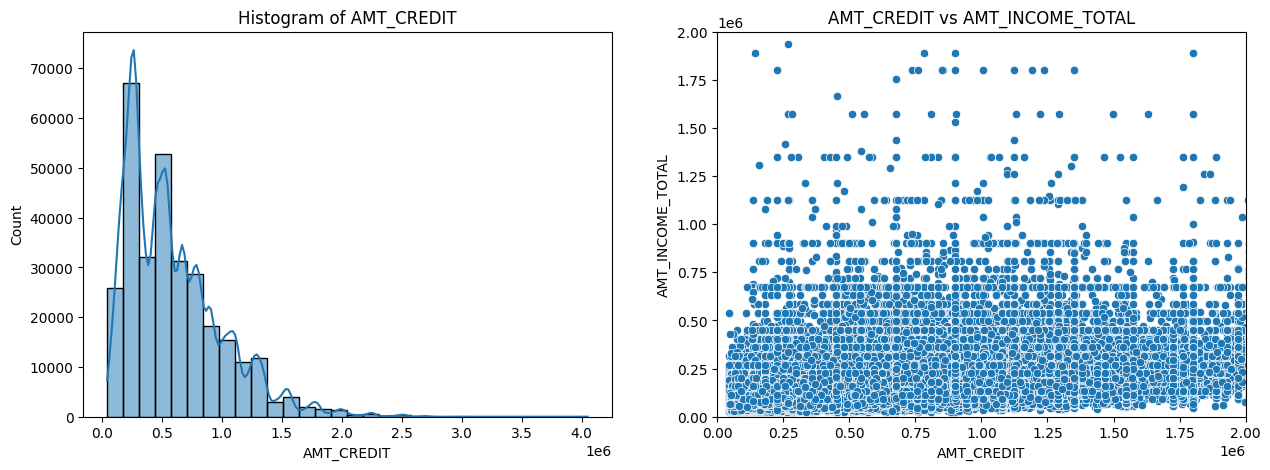

In [ ]:
#Make price histogram plots and scatter plots to compare
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_train['AMT_CREDIT'], kde=True, bins=30)
plt.title('Histogram of AMT_CREDIT')

plt.subplot(1, 2, 2)
sns.scatterplot(x='AMT_CREDIT', y='AMT_INCOME_TOTAL', data=df_train)
plt.title('AMT_CREDIT vs AMT_INCOME_TOTAL')
plt.xlim(0, 2000000)  # Batasan nilai pada sumbu x (AMT_CREDIT)
plt.ylim(0, 2000000)
plt.show()

Dari hasil visualisasi diatas, dapat disimpulkan:

>  Sebaran nilai AMT_CREDIT tidak normal dan nilainya berpusat di sekitar 600.000

> Nilai AMT_CREDIT jika dibandingkan dengan AMT_INCOME_TOTAL memiliki hubungan yang tidak linear, yaitu banyak customer yang memiliki jumah pinjaman melebihi nilai pendapatannya. Disini saya mengasumsikan bahwa customer membayarkan pinjamannya dalam beberapa periode tertentu sehingga jumlah pendapatannya tidak sebanding dengan jumlah pinjamannya.

### Amount Annuity Vs Amount Credit

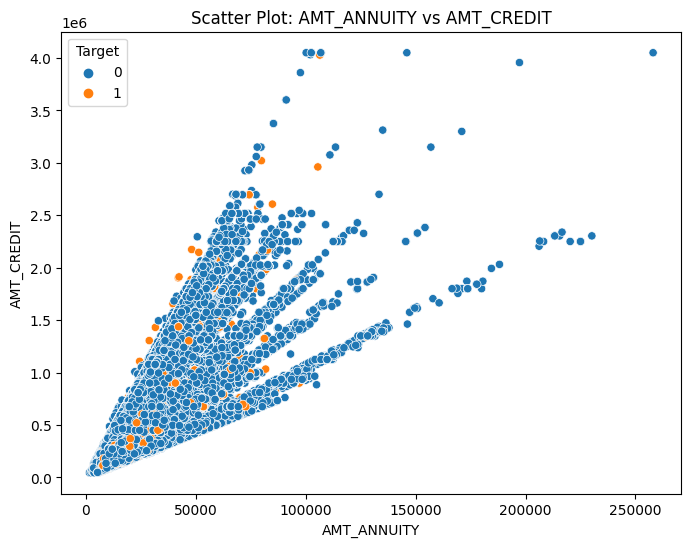

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat scatter plot dengan membedakan kelas menggunakan warna
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AMT_ANNUITY', y='AMT_CREDIT', hue='TARGET', data=df_train)
plt.xlabel('AMT_ANNUITY')
plt.ylabel('AMT_CREDIT')
plt.title('Scatter Plot: AMT_ANNUITY vs AMT_CREDIT')
plt.legend(title='Target')
plt.show()


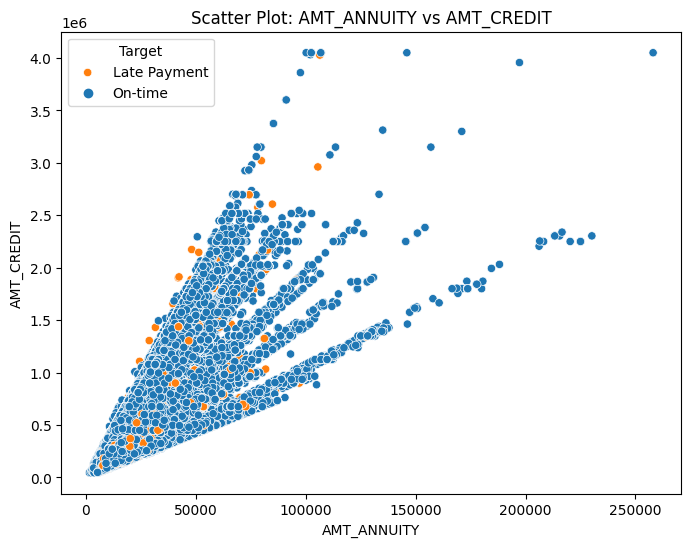

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the scatter plot data

# Create the scatter plot with different colors for each target class
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AMT_ANNUITY', y='AMT_CREDIT', hue='TARGET', data=df_train)
plt.xlabel('AMT_ANNUITY')
plt.ylabel('AMT_CREDIT')
plt.title('Scatter Plot: AMT_ANNUITY vs AMT_CREDIT')

# Add legend with target class labels
plt.legend(labels=['Late Payment','On-time'], title='Target')

# Show the plot
plt.show()


Dari visualisasi scatterplot yang membandingkan jumlah besaran **Pinjaman kredit** dan nilai **Anuitas** (Bunga) yang dibedakan berdasarkan kelas targetnya, bisa disimpulkan bahwa:

Nasabah yang menunggak tidak ditentukan dengan nilai **Pinjaman** atau nilai **Anuitas** karena tetap terdapat nasabah yang menunggak entah dari nilai yang rendah/tinggi.

### Family Status

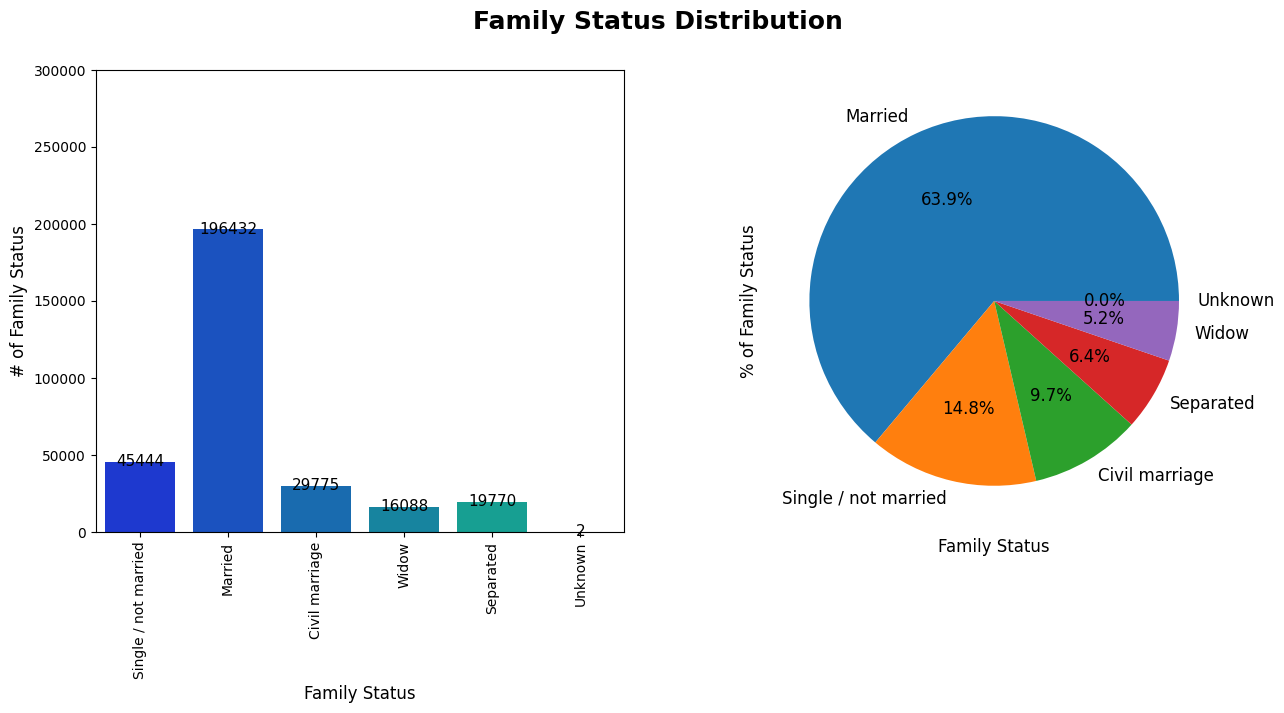

In [ ]:
# Membuat visualisasi Distribusi Family Status
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='NAME_FAMILY_STATUS', data=df_train, palette="winter", ax=ax[0])
ax[0].set_xlabel("Family Status", fontsize= 12)
ax[0].set_ylabel("# of Family Status", fontsize= 12)
fig.suptitle('Family Status Distribution', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,300000)
ax[0].tick_params(axis='x', rotation=90)
plt.xlabel("Family Status", fontsize= 12)
plt.ylabel("# of Family Status", fontsize= 12)

for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+205), ha='center', va='center',fontsize = 11)

df_train['NAME_FAMILY_STATUS'].value_counts().plot(kind='pie',autopct='%1.1f%%', textprops = {"fontsize":12})
ax[1].set_ylabel("% of Family Status", fontsize= 12)
plt.show()

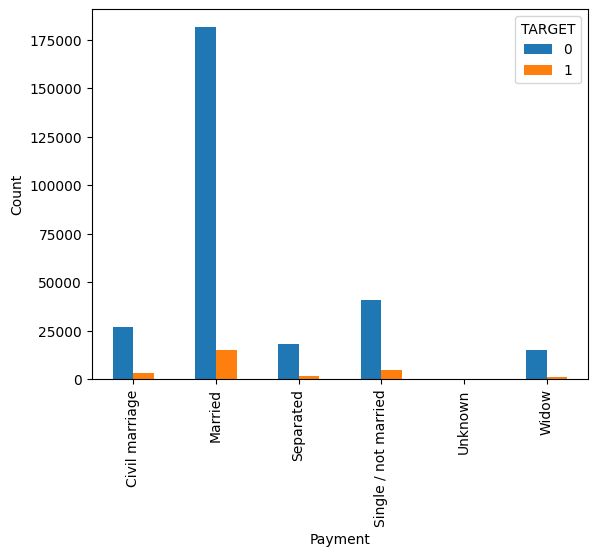

In [ ]:
# Mengelompokkan data berdasarkan membership_category dan menghitung statistik churn risk score
grouped = df_train.groupby('NAME_FAMILY_STATUS')['TARGET'].value_counts().unstack().fillna(0)

# Membuat barplot
grouped.plot(kind='bar', stacked=False)

# Memberikan judul pada sumbu x dan y
plt.xlabel('Payment')
plt.ylabel('Count')

# Menampilkan plot
plt.show()

Dari hasil visualisasi tersebut, status keluarga nasabah didominasi (**63,9%**) oleh nasabah yang sudah menikah (**Married**) sebanyak **196.432**, disusul oleh yang **Single / Not Married** dsb.

### Housing Type

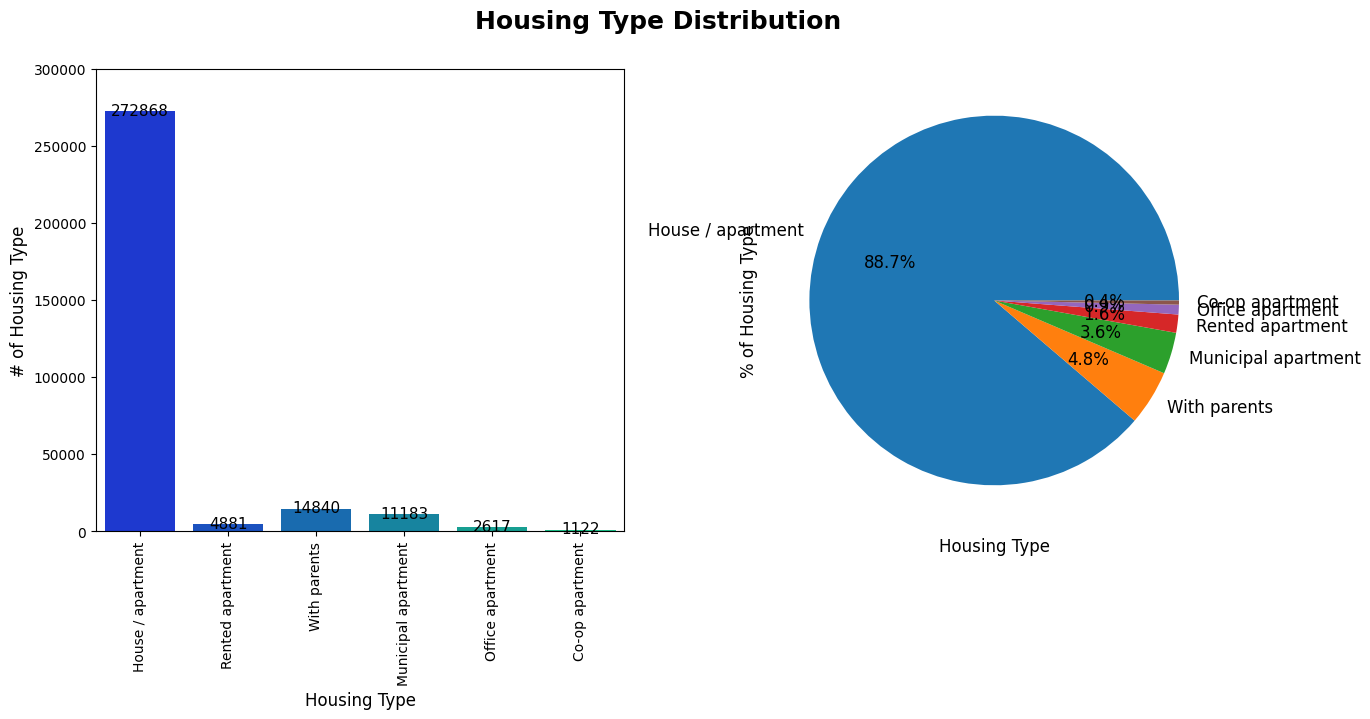

In [ ]:
# Membuat visualisasi Distribusi Payment
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='NAME_HOUSING_TYPE', data=df_train, palette="winter", ax=ax[0])
ax[0].set_xlabel("Housing Type", fontsize= 12)
ax[0].set_ylabel("# of Housing Type", fontsize= 12)
fig.suptitle('Housing Type Distribution', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,300000)
ax[0].tick_params(axis='x', rotation=90)
plt.xlabel("Housing Type", fontsize= 12)
plt.ylabel("# of Housing Type", fontsize= 12)

for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+205), ha='center', va='center',fontsize = 11)

df_train['NAME_HOUSING_TYPE'].value_counts().plot(kind='pie',autopct='%1.1f%%', textprops = {"fontsize":12})
ax[1].set_ylabel("% of Housing Type", fontsize= 12)
plt.show()

Dari hasil visualisasi tersebut, status tempat tinggal nasabah didominasi (**88,7%**) oleh nasabah yang sudah memiliki Rumah / Apartemen pribadi (**House /  Apartment**) sebanyak **272.868**, dari kesimpulan ini besar kemungkinan bahwa nasabah memerlukan layanan kredit untuk **kebutuhan rumah tangga** sehingga bisa dilakukan **partnership** dengan produk-produk kebutuhan rumah tangga yang bisa menguntungkan kedua pihak.

## 4 - Feature Engineering

### Data Balancing

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes in training data
data_majority = df_train[df_train['TARGET'] == 0]
data_minority = df_train[df_train['TARGET'] == 1]

print("majority class before downsampling:", data_majority.shape)
print("minority class before upsampling:", data_minority.shape)

# Determine the desired number of samples for balancing
desired_samples = 128930

# Downsample majority class
data_majority_downsampled = resample(data_majority,
                                     replace=False,  # sample without replacement
                                     n_samples=desired_samples,  # to match desired samples
                                     random_state=123)  # reproducible results

# Upsample minority class
data_minority_upsampled = resample(data_minority,
                                   replace=True,  # sample with replacement
                                   n_samples=desired_samples,  # to match desired samples
                                   random_state=123)  # reproducible results

# Combine majority class with downsampled majority class and upsampled minority class
df_balance = pd.concat([data_majority_downsampled, data_minority_upsampled])

# Display new class counts
print("After balancing\n",df_balance.TARGET.value_counts(),sep = "")

majority class before downsampling: (282686, 122)
minority class before upsampling: (24825, 122)
After balancing
0    128930
1    128930
Name: TARGET, dtype: int64


Dilakukan balancing pada kedua kelas TARGET dengan jumlah yang ditentukan yaitu nilai pertengahan antara majority class dan minority class, sehingga kedua class memiliki proporsi yang seimbang.

Penentuan jumlah sampling: (Jumlah nilai mayoritas - Jumlah nilai minoritas) / 2

Sehingga bertemu pada nilai tengah-tengahnya.

### Split `X` (Features) and `y` (Target)

In [ ]:
# Splitting `X` and `y`

X = df_balance.drop(['TARGET'], axis=1)
y = df_balance['TARGET']
X

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
242916,381209,Cash loans,F,N,Y,0,77850.0,284400.0,10215.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
112259,230229,Cash loans,F,Y,Y,1,270000.0,715095.0,49900.5,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
71881,183353,Cash loans,F,N,Y,0,189000.0,754740.0,24475.5,630000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
28988,133681,Cash loans,M,N,Y,0,157500.0,180000.0,21492.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
185409,314926,Cash loans,F,N,Y,0,180000.0,1039500.0,44172.0,1039500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67070,177774,Cash loans,M,N,Y,0,225000.0,238500.0,28435.5,238500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
94279,209469,Cash loans,F,N,Y,0,81000.0,310500.0,17955.0,310500.0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
264173,405913,Cash loans,F,N,Y,0,135000.0,450000.0,24543.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
21320,124839,Cash loans,F,N,N,1,180000.0,450000.0,32746.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


### Split Train-Set and Test-Set

In [ ]:
# Splitting between Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
X_train

Train Size :  (206288, 121)
Test Size  :  (51572, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
93734,208845,Cash loans,M,Y,N,0,121500.0,810000.0,32251.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
222249,357453,Cash loans,F,N,N,1,139500.0,816660.0,26473.5,585000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
64780,175124,Cash loans,M,Y,Y,1,337500.0,728460.0,57685.5,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,7.0
84371,197879,Cash loans,F,Y,Y,0,90000.0,90000.0,9220.5,90000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
170893,298048,Cash loans,M,Y,Y,0,90000.0,364500.0,28926.0,364500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85058,198678,Cash loans,F,Y,N,0,157500.0,1314117.0,38551.5,1147500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
252318,391950,Cash loans,M,Y,Y,0,144000.0,521280.0,26613.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
185855,315455,Cash loans,M,Y,N,0,135000.0,624735.0,53748.0,553500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
307001,455681,Cash loans,M,Y,N,0,180000.0,835380.0,35523.0,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0


### Handling Missing Values

In [ ]:
X_train.isna().sum()

SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     31420
AMT_REQ_CREDIT_BUREAU_WEEK    31420
AMT_REQ_CREDIT_BUREAU_MON     31420
AMT_REQ_CREDIT_BUREAU_QRT     31420
AMT_REQ_CREDIT_BUREAU_YEAR    31420
Length: 121, dtype: int64

Terdapat missing value.

Missing value akan ditangani pada tahap pipeline.

### Get Numerical Columns and Categorical Columns

In [ ]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_M

### Handling Outlier

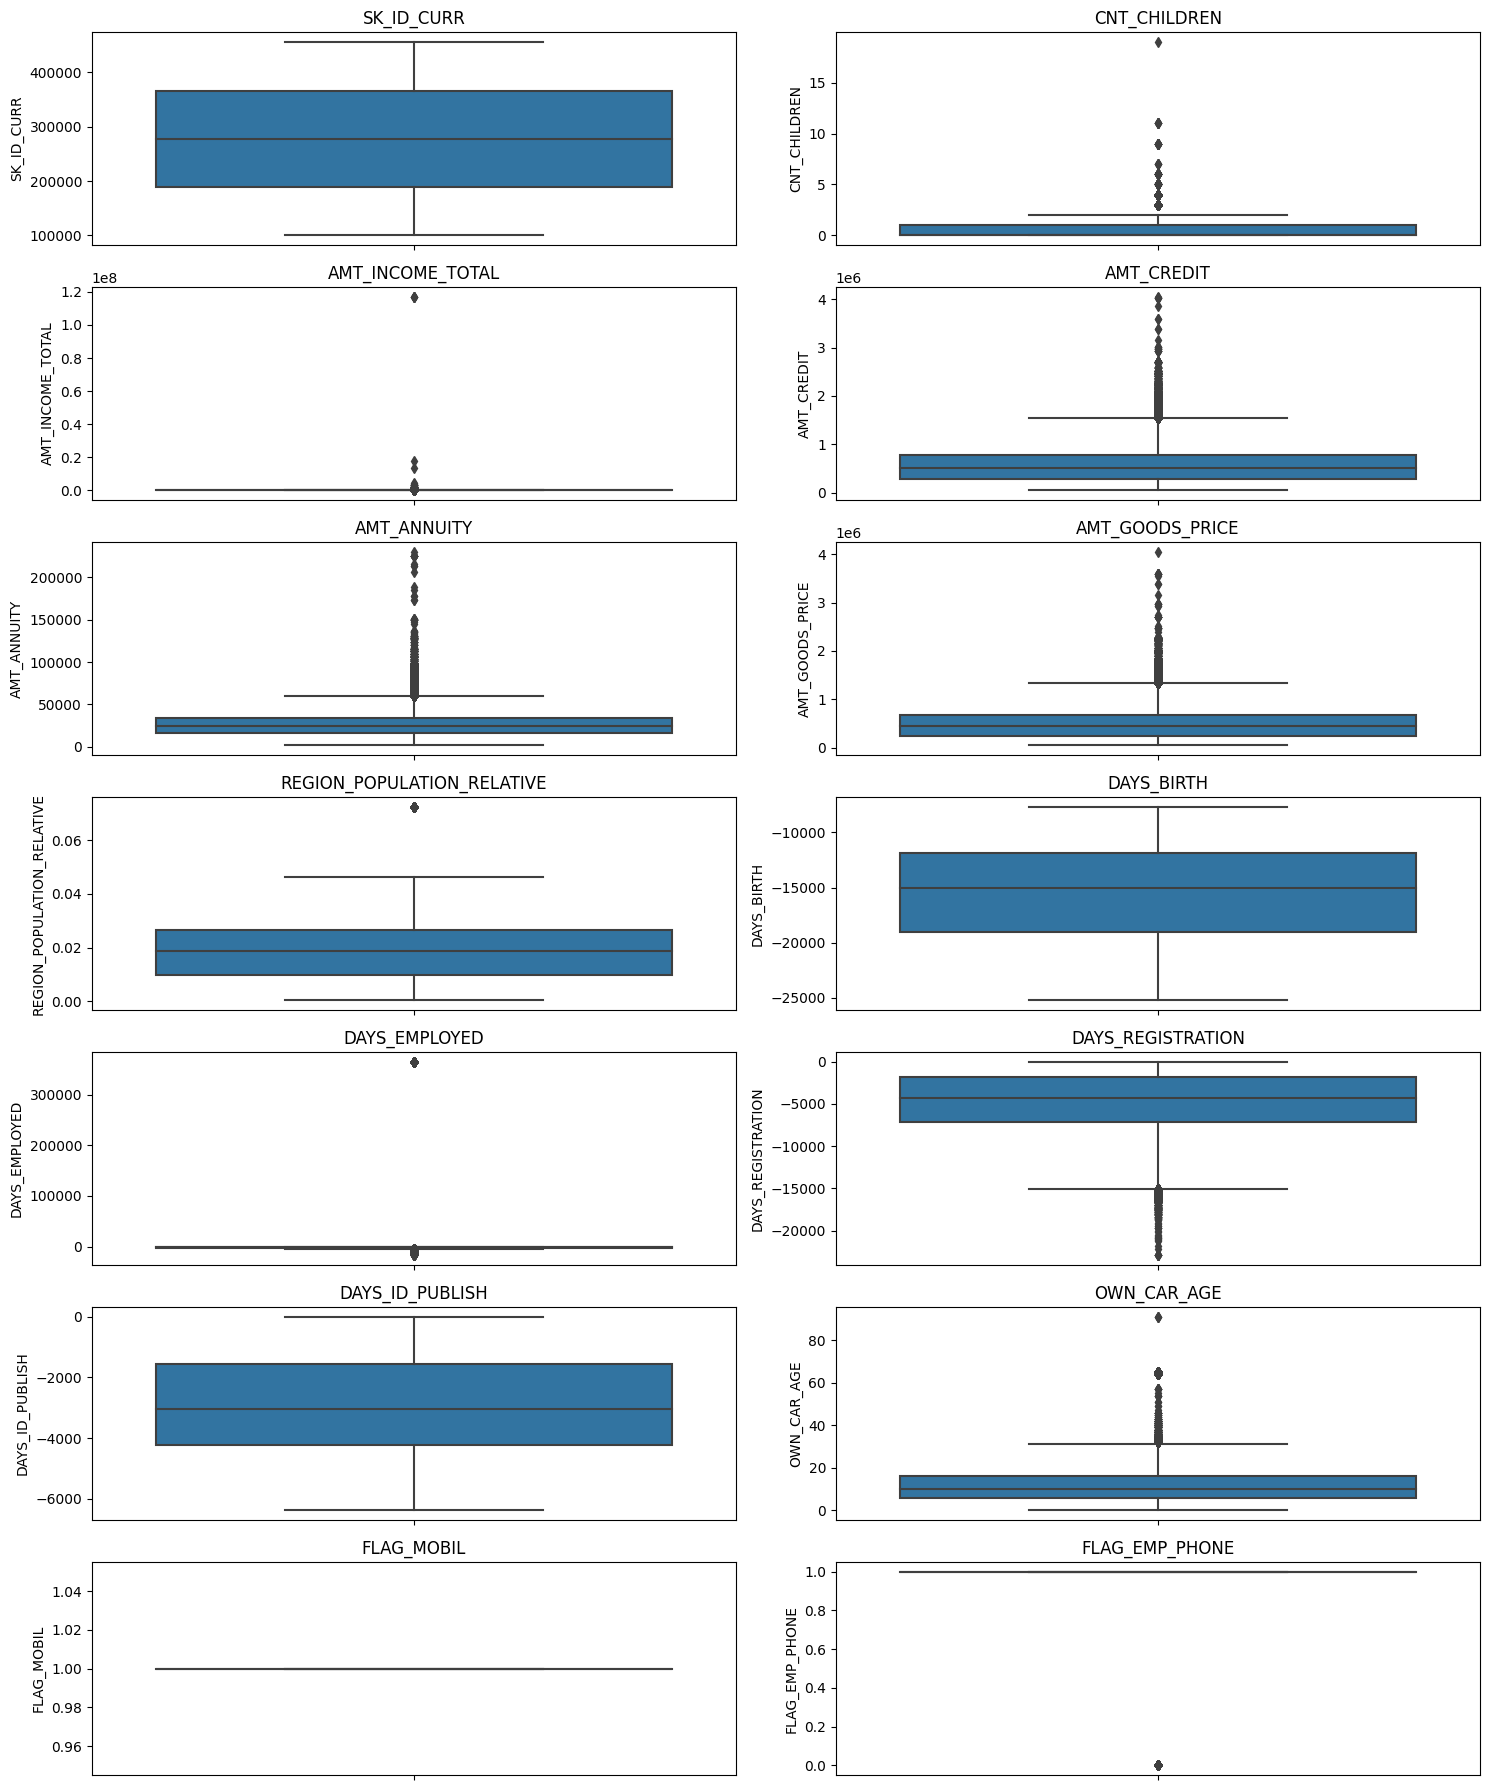

In [ ]:
num_features = num_columns[:14]
num_rows = 7
num_cols = 2

plt.figure(figsize=(15, 18))

# Membuat boxplot untuk setiap fitur
for i, feature in enumerate(num_features):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(data=X_train, y=feature)
    plt.title(feature)

plt.tight_layout()
plt.show()


Terdapat outlier pada beberapa fitur numerik seperti: 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_EMP_PHONE'

### Pipeline

In [ ]:
# Create A Pipeline

# Create a pipeline for numerical features with median imputation and scaling
num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),  # Impute missing values with median
    MinMaxScaler()  # Scale numerical features
)

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])


In [ ]:
# Transform data using the pipeline
X_train_transformed = final_pipeline.fit_transform(X_train)
# Transform the test data using the fitted pipeline
X_test_transformed = final_pipeline.transform(X_test)

# Get feature names from the pipelines
num_feature_names = final_pipeline.named_transformers_['pipe_num'].named_steps['minmaxscaler'].get_feature_names_out(num_columns)
cat_feature_names = final_pipeline.named_transformers_['pipe_cat'].named_steps['onehotencoder'].get_feature_names_out(cat_columns)

# Combine numerical and categorical feature names
feature_names = np.concatenate((num_feature_names, cat_feature_names), axis=0)

# Convert the transformed data into a DataFrame
transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)
transformed_df_test = pd.DataFrame(X_test_transformed, columns=feature_names)

### Feature Selection

Berdasarkan observasi personal terhadap dataset, terdapat beberapa fitur yang secara logis tidak terlalu signifikan terhadap keputusan nasabah untuk membayar kartu kredit, maka beberapa fitur didrop untuk selanjutnya dilakukan seleksi fitur dengan metode ANOVA.

In [ ]:
transformed_df.drop(['SK_ID_CURR'], axis=1, inplace=True)

In [ ]:
num_columns_train_selected = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns_train_selected = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns_train_selected)
print('Categorical Columns : ', cat_columns_train_selected)

Numerical Columns :  ['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_M

In [ ]:
# Melakukan seleksi fitur untuk fitur numerik
selector_numeric = SelectKBest(score_func=f_classif, k='all')
selected_features = selector_numeric.fit_transform(transformed_df, y_train)

# Mendapatkan p-value dari fitur-fitur terpilih
p_values = selector_numeric.pvalues_

#Mendapatkan feature names
feature_names = transformed_df.columns.tolist()

# Membuat DataFrame untuk menampilkan nama fitur dan p-value
p_values_df = pd.DataFrame({'Feature': feature_names, 'p-value': p_values})

# Mengurutkan DataFrame berdasarkan p-value dari yang terkecil ke terbesar
sorted_p_values_df = p_values_df.sort_values(by='p-value')

# Menampilkan hanya fitur-fitur yang signifikan (dengan p-value < 0.01)
significant_features = sorted_p_values_df[sorted_p_values_df['p-value'] < 0.01]

# Menampilkan DataFrame dengan fitur-fitur yang signifikan saja
print(significant_features)



ValueError: ignored

In [ ]:
top_15_features = significant_features.head(15)
print(top_15_features)


                                               Feature  p-value
125                         NAME_INCOME_TYPE_Pensioner      0.0
29                                        EXT_SOURCE_2      0.0
30                                        EXT_SOURCE_3      0.0
20                         REGION_RATING_CLIENT_W_CITY      0.0
19                                REGION_RATING_CLIENT      0.0
78                              DAYS_LAST_PHONE_CHANGE      0.0
107                                      CODE_GENDER_F      0.0
108                                      CODE_GENDER_M      0.0
28                                        EXT_SOURCE_1      0.0
129                           NAME_INCOME_TYPE_Working      0.0
13                                      FLAG_EMP_PHONE      0.0
8                                        DAYS_EMPLOYED      0.0
7                                           DAYS_BIRTH      0.0
131               NAME_EDUCATION_TYPE_Higher education      0.0
134  NAME_EDUCATION_TYPE_Secondary / sec

In [ ]:
columns_significant = significant_features['Feature'].tolist()
print('Significant Columns : ', columns_significant)

Significant Columns :  ['NAME_INCOME_TYPE_Pensioner', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER_F', 'CODE_GENDER_M', 'EXT_SOURCE_1', 'NAME_INCOME_TYPE_Working', 'FLAG_EMP_PHONE', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'ORGANIZATION_TYPE_XNA', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 'DAYS_REGISTRATION', 'FLAG_DOCUMENT_3', 'AMT_GOODS_PRICE', 'OCCUPATION_TYPE_Laborers', 'EMERGENCYSTATE_MODE_No', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'EMERGENCYSTATE_MODE_nan', 'HOUSETYPE_MODE_block of flats', 'FLOORSMAX_MODE', 'OCCUPATION_TYPE_nan', 'HOUSETYPE_MODE_nan', 'REG_CITY_NOT_LIVE_CITY', 'WALLSMATERIAL_MODE_nan', 'REGION_POPULATION_RELATIVE', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE_Panel', 'DEF_30_CNT_SOCIAL_CIRCLE', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'TOTALAREA_MODE', 'AMT_CREDIT', 'NAME_CONTRA

In [ ]:
num_sig_columns = list(set(num_columns) & set(columns_significant))
print("Numerical columns:", num_sig_columns)


Numerical columns: ['DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT_W_CITY', 'FLOORSMIN_AVG', 'ELEVATORS_MEDI', 'AMT_INCOME_TOTAL', 'NONLIVINGAREA_MEDI', 'FLAG_DOCUMENT_16', 'FLOORSMIN_MEDI', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE_1', 'LIVINGAPARTMENTS_MODE', 'FLOORSMAX_MODE', 'NONLIVINGAREA_AVG', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'YEARS_BUILD_MEDI', 'REGION_RATING_CLIENT', 'FLAG_DOCUMENT_3', 'REGION_POPULATION_RELATIVE', 'APARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG', 'DAYS_EMPLOYED', 'YEARS_BEGINEXPLUATATION_MEDI', 'BASEMENTAREA_AVG', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_PHONE', 'AMT_CREDIT', 'DAYS_ID_PUBLISH', 'AMT_GOODS_PRICE', 'NONLIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'YEARS_BUILD_AVG', 'LIVINGAREA_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'FLOORSMAX_MEDI', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_AVG', 'OWN_CAR_AGE', 'ELEVATORS_MODE', 'FLOORSMAX_AVG', 'ELEVATORS_AVG', 'FLAG_DOCUMENT_5', 'YEARS_BUILD_MODE', 'NONLIVINGAPARTMENTS_MODE', 'EXT_SOURCE_2', 'DEF_30_CNT_SOCIAL_CIRCLE',

In [ ]:
# Mengkonversi list menjadi set
num_sig_columns = set(num_sig_columns)
columns_significant_set = set(columns_significant)

# Mendapatkan elemen-elemen yang tidak termasuk dalam columns_significant_set
cat_sig_columns = list(columns_significant_set - num_sig_columns)

# Menampilkan elemen-elemen yang tidak termasuk dalam num_columns_train_selected
print("Categorical columns:", cat_sig_columns)


Categorical columns: ['NAME_INCOME_TYPE_Working', 'OCCUPATION_TYPE_Core staff', 'ORGANIZATION_TYPE_Bank', 'OCCUPATION_TYPE_Secretaries', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'CODE_GENDER_F', 'WALLSMATERIAL_MODE_Monolithic', 'NAME_TYPE_SUITE_Spouse, partner', 'ORGANIZATION_TYPE_Self-employed', 'ORGANIZATION_TYPE_Telecom', 'NAME_EDUCATION_TYPE_Higher education', 'OCCUPATION_TYPE_Medicine staff', 'CODE_GENDER_M', 'OCCUPATION_TYPE_Accountants', 'NAME_HOUSING_TYPE_House / apartment', 'ORGANIZATION_TYPE_Industry: type 3', 'NAME_HOUSING_TYPE_Co-op apartment', 'ORGANIZATION_TYPE_Transport: type 4', 'NAME_INCOME_TYPE_Commercial associate', 'NAME_TYPE_SUITE_Unaccompanied', 'ORGANIZATION_TYPE_Business Entity Type 3', 'NAME_FAMILY_STATUS_Civil marriage', 'FONDKAPREMONT_MODE_reg oper account', 'ORGANIZATION_TYPE_Military', 'OCCUPATION_TYPE_Drivers', 'ORGANIZATION_TYPE_Transport: type 3', 'NAME_CONTRACT_TYPE_Revolving loans', 'ORGANIZATION_TYPE_Housing', 'ORGANIZATION_TYPE_Cleaning',

Dari hasil feature selection ditetapkan fitur kategorik yang signifikan yaitu:


1.   NAME_EDUCATION_TYPE
2.   OCCUPATION_TYPE
3.   NAME_HOUSING_TYPE
4.   NAME_CONTRACT_TYPE
5.   NAME_INCOME_TYPE
6.   ORGANIZATION_TYPE
7.   OCCUPATION_TYPE
8.   CODE_GENDER
9.   NAME_HOUSING_TYPE




Mengambil data yang fiturnya merupakan fitur yang signifikan/penting.

In [ ]:
# Get the significant feature names
significant_feature_names = significant_features['Feature'].tolist()

# Filter the transformed_df based on the significant feature names
X_train_final = transformed_df[significant_feature_names].copy()
X_test_final = transformed_df_test[significant_feature_names].copy()

## 5 - Model Definition

Berdasarkan referensi pada website kaggle, agar bisa mengatasi keterbatasan waktu pada pengerjaan projek ini, Model Logistic Regression dan Random Forest merupakan model yang direkomendasikan dan dipilih.

In [ ]:
# Training using Logistic Regression
model_log_reg = LogisticRegression()

# Training using Random Fores
model_rnd = RandomForestClassifier()


## 6 - Model Training

In [ ]:
# Train the LogReg Model
model_log_reg.fit(X_train_final, y_train)

LogisticRegression()

In [ ]:
# Train the Random Forest Model
model_rnd.fit(X_train_final, y_train)

RandomForestClassifier()

## 7 - Model Evaluation

In [ ]:
# Memprediksi nilai target untuk data testing
y_pred_logreg = model_log_reg.predict(X_test_final)

In [ ]:
# Memprediksi nilai target untuk data testing
y_pred_rnd = model_rnd.predict(X_test_final)


Menghitung nilai ROC-AUC

In [ ]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred_logreg)
print("ROC-AUC Score:", auc_score)


ROC-AUC Score: 0.6851927404754855


In [ ]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred_rnd)
print("ROC-AUC Score:", auc_score)


ROC-AUC Score: 0.9762234071762261


In [ ]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68     25676
           1       0.69      0.69      0.69     25896

    accuracy                           0.69     51572
   macro avg       0.69      0.69      0.69     51572
weighted avg       0.69      0.69      0.69     51572



In [ ]:
print(classification_report(y_test, y_pred_rnd))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     25676
           1       0.97      0.99      0.98     25896

    accuracy                           0.98     51572
   macro avg       0.98      0.98      0.98     51572
weighted avg       0.98      0.98      0.98     51572



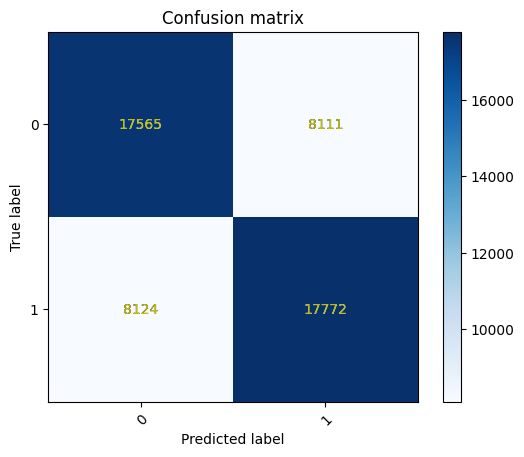

In [ ]:
from sklearn.metrics import confusion_matrix

# define labels
labels = np.unique(y_test)


cm = confusion_matrix(y_test, y_pred_logreg)
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Add text in cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Add X axis and Y axis
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=labels, yticklabels=labels,
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')


# Label rotation on X axis
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Add value to cell
for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="y")

# Show plot
plt.show()

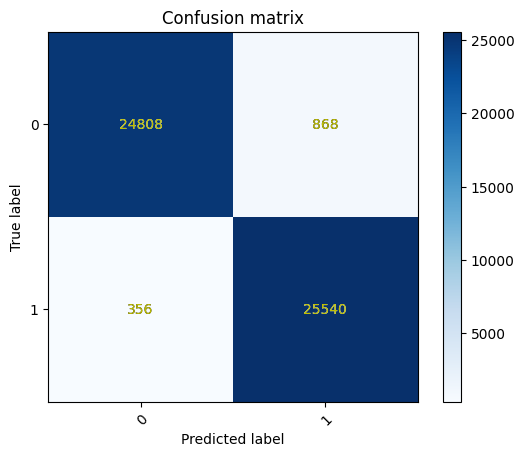

In [ ]:
from sklearn.metrics import confusion_matrix

# define labels
labels = np.unique(y_test)


cm = confusion_matrix(y_test, y_pred_rnd)
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Add text in cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Add X axis and Y axis
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=labels, yticklabels=labels,
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')


# Label rotation on X axis
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Add value to cell
for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="y")

# Show plot
plt.show()

* Model Random Forest menunjukan hasil performa paling baik dengan metriks evaluasi ROC-AUC Test Set - **Logistic Regression** menghasilkan nilai sebesar **97%**, sehingga model memiliki kemampuan yang sangat baik dalam membedakan antara kelas positif dan kelas negatif pada data uji.

* Berdasarkan dari visualisasi Confusion Matrix - Test Set - **Random Forest** menunjukkan bahwa:

  Ada **24.808** pelanggan yang aktualnya adalah menunggak (0) dan benar-benar terprediksi demikian. **True Negative**

  Ada **868** pelanggan yang aktualnya adalah menunggak (0) tetapi terprediksi sebagai tepat waktu (1). **False Positive**

  Ada **356** pelanggan yang aktualnya adalah tepat waktu (1) tetapi terprediksi sebagai menunggak (0). **False Negative**

  Ada **25.540** pelanggan yang terprediksi tepat waktu (1) dan benar-benar terprediksi demikian. **True Positive**

  Klasifikasi model sudah sangat baik membedakan pembayaran tiap nasabah. Sehingga model ini disimpulkan sebagai **Good Fit**.

## 8 - Model Saving

In [ ]:
# Save the Files

import pickle, joblib
import json

with open('model_rnd.pkl', 'wb') as file_1:
  pickle.dump(model_rnd, file_1)

with open('list_num_cols.txt', 'w') as file_2:
  json.dump(num_columns, file_2)

with open('list_cat_cols.txt','w') as file_3:
  json.dump(cat_columns, file_3)

with open('list_sig_cols.txt','w') as file_4:
  json.dump(significant_feature_names, file_4)


In [ ]:
from joblib import dump

# Save the final pipeline
dump(final_pipeline, 'final_pipeline_deploy.joblib')


['final_pipeline_deploy.joblib']

In [ ]:
# Load All Files

with open('model_rnd.pkl', 'rb') as file_1:
  rnd_model = pickle.load(file_1)


## 9 - Model Inference

In [ ]:
data_inf = pd.read_csv('/content/drive/MyDrive/home-credit-default-risk/application_test.csv')

In [ ]:
data_inf.drop(['SK_ID_CURR'], axis=1, inplace=True)

In [ ]:
data_inf_transformed = final_pipeline.transform(data_inf)

# Get feature names from the pipelines
num_feature_names_inf = final_pipeline.named_transformers_['pipe_num'].named_steps['minmaxscaler'].get_feature_names_out(num_columns)
cat_feature_names_inf = final_pipeline.named_transformers_['pipe_cat'].named_steps['onehotencoder'].get_feature_names_out(cat_columns)

# Combine numerical and categorical feature names
feature_names_inf = np.concatenate((num_feature_names_inf, cat_feature_names_inf), axis=0)

# Convert the transformed data into a DataFrame
data_inf_final = pd.DataFrame(data_inf_transformed, columns=feature_names_inf)


In [ ]:
# Filter the transformed_df based on the significant feature names
data_inf_final = data_inf_final[significant_feature_names].copy()


In [ ]:
y_pred_inf = model_rnd.predict(data_inf_final)
y_pred_inf = pd.DataFrame([y_pred_inf])
y_pred_inf

,0,1,2,3,4,5,6,7,8,9,...,48734,48735,48736,48737,48738,48739,48740,48741,48742,48743
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
unique_values, counts = np.unique(y_pred_inf, return_counts=True)
for value, count in zip(unique_values, counts):
    label = "Jumlah data terprediksi 0" if value == 0 else "Jumlah data terprediksi 1"
    print(f"{label}: {count}")


Jumlah data terprediksi 0: 46854
Jumlah data terprediksi 1: 1890


# 5 -  Conclusion and Recommendation

## 5.1 Model Analysis

* Model **Random Forest** menghasilkan dugaan yang palig baik dibanding model **Logistic Regression** dari nilai accuracy, precission, recal, dan f1-score juga pemetaannya bisa dilihat pada confussion matrix.

* Berdasarkan dari visualisasi Confusion Matrix - Test Set - **Random Forest** menunjukkan bahwa:

  Ada **24.808** pelanggan yang aktualnya adalah menunggak (0) dan benar-benar terprediksi demikian. **True Negative**

  Ada **868** pelanggan yang aktualnya adalah menunggak (0) tetapi terprediksi sebagai tepat waktu (1). **False Positive**

  Ada **356** pelanggan yang aktualnya adalah tepat waktu (1) tetapi terprediksi sebagai menunggak (0). **False Negative**

  Ada **25.540** pelanggan yang terprediksi tepat waktu (1) dan benar-benar terprediksi demikian. **True Positive**

  Klasifikasi model sudah sangat baik membedakan pembayaran tiap nasabah. Sehingga model ini disimpulkan sebagai **Good Fit**.

  * Terdapat kelemahan pada model ini yaitu: kurang baik untuk memprediksi nasabah yang menunggak dikarenakan data sample didominasi oleh data yang memiliki Target = 0 (Tepat Waktu).

## 5.2 - Overall Analysis

* Ditemukan variabel-variabel yang paling berpengaruh dalam menduga pembayaran nasabah, yaitu:

1.   NAME_EDUCATION_TYPE
2.   OCCUPATION_TYPE
3.   NAME_HOUSING_TYPE
4.   NAME_CONTRACT_TYPE
5.   NAME_INCOME_TYPE
6.   ORGANIZATION_TYPE
7.   OCCUPATION_TYPE
8.   CODE_GENDER
9.   NAME_HOUSING_TYPE
10.  LIVINGAREA_AVG
11.  AMT_GOODS_PRICE
12.  BASEMENTAREA_AVG
13.  FLOORSMIN_AVG
14.  LIVINGAREA_MEDI
15.  FLOORSMAX_MODE
16.  AMT_INCOME_TOTAL
17.  DAYS_EMPLOYED
18.  REGION_RATING_CLIENT_W_CITY

* Jika melihat dari segi bisnis, **jenis tempat tinggal nasabah** didominasi (**88,7%**) oleh nasabah yang sudah memiliki Rumah / Apartemen pribadi (**House /  Apartment**) sebanyak **272.868**, dari kesimpulan ini besar kemungkinan bahwa nasabah memerlukan layanan kredit untuk **kebutuhan rumah tangga** sehingga bisa dilakukan **partnership** dengan produk-produk kebutuhan rumah tangga yang bisa menguntungkan kedua pihak.

* Pengguna kartu kredit didominasi oleh **Gender = FEMALE**. Ini menandakan bahwa customer wanita lebih banyak melakukan pinjaman kartu kredit. Sehingga perlu dilakukan penawaran yang bisa menarik minat nasabah wanita.

* Nasabah yang **menunggak** tidak ditentukan dengan nilai **Pinjaman** atau nilai **Anuitas** karena tetap terdapat nasabah yang menunggak entah dari nilai pinjaman yang rendah/tinggi.
